<a href="https://colab.research.google.com/github/gtm144/Data-Science-Notebooks/blob/master/Kmeans_for_Machine_Learning_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Introduction for the Machine Learning Club

K-means Clustering is a type of unsupervised learning problem where we try to group similar data based on their underlying structure into cohorts/clusters. K-means algorithm is a famous clustering algorithm that is ubiquitously used. K represents the number of clusters we are going to classify our data points into.

In this section, we'll explore how to apply Scikitlearn and have a good aproach to k optimal numbers.



In [0]:
##Load data and libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from numpy import sqrt

iris = sns.load_dataset('iris')
df = iris.drop('species', axis=1)

The way K-means works is that follows a sequence of steps... 

1. Place centroids randomly 
2. For each data point find nearest centroid(k) and then assign point to cluster.
3. After that, for each cluster calculate mean of all points assigned to it, then relocate centroid.
4. Repeat step 2 and 3 until convergence or until the end of a fixed number of iterations.

Look the graph below in order to see this intuition.

![alt text](https://cdn-images-1.medium.com/max/600/0*PQa0wLR3drFiJuoh.gif)

However, we need to figure out the optimal number of clusters and there are two methods to do it.

## Graph WCCS by K Clusters for Iris Dataset

First, We need the graph from Avg within clusters sum-of-squares from Centroid (WCCS) and K Clusters.

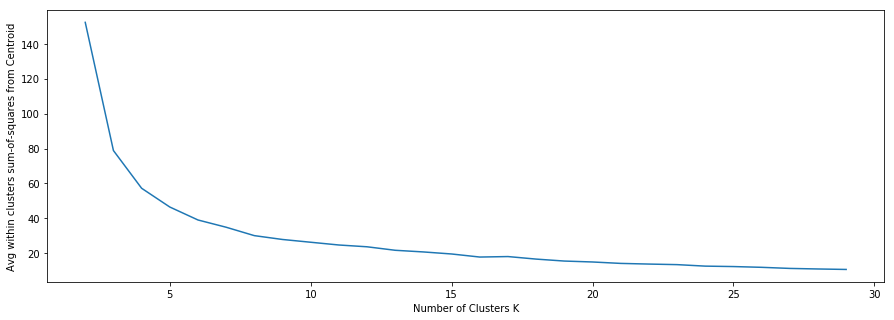

In [0]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 30):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss
  
sum_of_squares = calculate_wcss(df)

plt.figure(figsize=(15,5))
plt.xlabel('Number of Clusters K')
plt.ylabel('Avg within clusters sum-of-squares from Centroid')
plt.plot(list(range(2, 30)), sum_of_squares)

## Elbow Method

Just by looking at the graph it reaches an optimum minimum value. Even though the within-cluster distance decreases after 3, we would be doing more computations. The reason it is named the elbow method is that the optimum number of clusters would represent an elbow joint. But to define a more mathematical approach we would look the second method.

Elbow method provides a way calculate the distance between a point and a line as we can see in the formula below.

$ P(x_a, y_a, (X, Y)) = \dfrac{\vert (Y_1-Y_0)x_a -(X_1-X_0)y_a + X_1Y_0 - Y_1X_0}{\sqrt{(X_1-X_0)^2 + (Y_1-Y_0)^2}} $

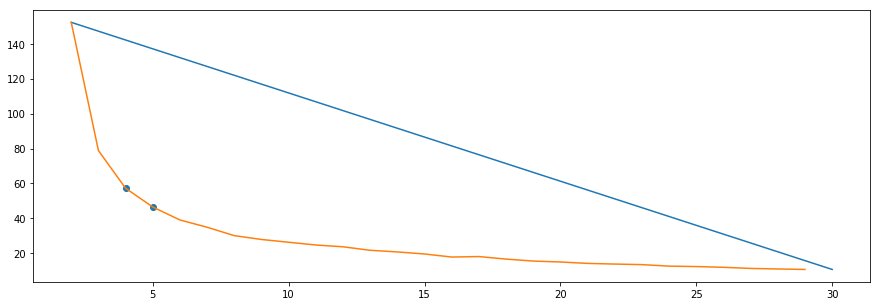

In [0]:
plt.figure(figsize=(15,5))
plt.plot([2, 30], [sum_of_squares[0], sum_of_squares[-1]])
plt.scatter([4,5], [sum_of_squares[2], sum_of_squares[3]])
plt.plot(list(range(2, 30)), sum_of_squares)

In [0]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-y2)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances))

In [0]:
#@title Finally the optimal number of clusters would be 3.
sum_of_squares = calculate_wcss(df)
n = optimal_number_of_clusters(sum_of_squares)
kmeans = KMeans(n_clusters=1)
iris['clusters'] = kmeans.fit_predict(df)
iris['species_encoded'] = LabelEncoder().fit_transform(iris['species'])
n+1

3

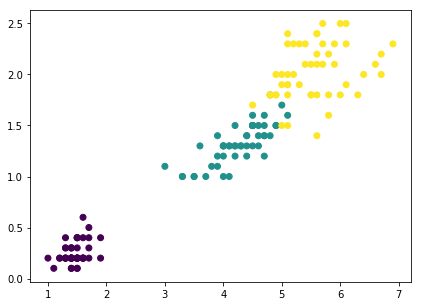

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['species_encoded'])

plt.show()